In [102]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [109]:
df = pd.read_csv('API_Trend_outlier.csv')  # replace with your dataset path

In [110]:
# Convert categorical features to numerical
le = LabelEncoder()
df['APPNAME'] = le.fit_transform(df['APPNAME'])
df['API'] = le.fit_transform(df['API'])
df['DATE'] = pd.to_datetime(df['DATE'], format="%d-%m-%Y")


In [111]:
df.sort_values(by=['DATE'], inplace=True)
df

,DATE,APPNAME,API,SUM_COUNT,zsc,Anomaly
0,2023-07-04,0,8,8,-0.316085,0
15263,2023-07-04,117,3,13328,0.855919,0
1531,2023-07-04,60,25,6,0.664411,0
15341,2023-07-04,117,5,830,0.936413,0
15419,2023-07-04,118,3,3,-1.253563,0
...,...,...,...,...,...,...
17428,2023-09-19,129,5,1627,-0.572736,0
12685,2023-09-19,98,15,4181,0.496612,0
4949,2023-09-19,56,23,105,-2.796672,0
20839,2023-09-19,8,5,3621378,-0.553129,0


In [112]:
# Check if there are missing values
print(df.isnull().sum())

# If there are missing values, decide how to handle them, e.g., fill with mean
df = df.fillna(df.mean())
df


DATE           0
APPNAME        0
API            0
SUM_COUNT      0
zsc          183
Anomaly        0
dtype: int64


,DATE,APPNAME,API,SUM_COUNT,zsc,Anomaly
0,2023-07-04,0,8,8,-0.316085,0
15263,2023-07-04,117,3,13328,0.855919,0
1531,2023-07-04,60,25,6,0.664411,0
15341,2023-07-04,117,5,830,0.936413,0
15419,2023-07-04,118,3,3,-1.253563,0
...,...,...,...,...,...,...
17428,2023-09-19,129,5,1627,-0.572736,0
12685,2023-09-19,98,15,4181,0.496612,0
4949,2023-09-19,56,23,105,-2.796672,0
20839,2023-09-19,8,5,3621378,-0.553129,0


In [113]:
df_train = df[df['DATE'] < '2023-09-19']
df_test = df[df['DATE'] >= '2023-09-19']

In [114]:
# Extract features from the 'DATE' column
#df_train['DayOfMonth'] = df_train['DATE'].dt.day
#df_train['Month'] = df_train['DATE'].dt.month
#df_train['DayOfWeek'] = df_train['DATE'].dt.dayofweek
#
#Drop the original 'DATE' column if you no longer need it
df_train.drop(columns=['DATE'], inplace=True)
#
#Now, you can use the extracted features for analysis and modeling
#df_test['DayOfMonth'] = df_test['DATE'].dt.day
#df_test['Month'] = df_test['DATE'].dt.month
#df_test['DayOfWeek'] = df_test['DATE'].dt.dayofweek

# Drop the original 'DATE' column if you no longer need it
df_test.drop(columns=['DATE'], inplace=True)


C:\Users\Prime\AppData\Local\Temp\ipykernel_18980\3687682806.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['DATE'], inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_18980\3687682806.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['DATE'], inplace=True)


In [115]:
df_train.drop(columns=['SUM_COUNT'], inplace=True)
df_test.drop(columns=['SUM_COUNT'], inplace=True)

C:\Users\Prime\AppData\Local\Temp\ipykernel_18980\459758581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['SUM_COUNT'], inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_18980\459758581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['SUM_COUNT'], inplace=True)


In [117]:
an_train = df_train['Anomaly']
an_test = df_test['Anomaly']
df_train.drop(columns=['Anomaly'], axis=1 ,inplace=True)
df_test.drop(columns=['Anomaly'], axis=1 ,inplace=True)

C:\Users\Prime\AppData\Local\Temp\ipykernel_18980\2300831107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['Anomaly'], axis=1 ,inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_18980\2300831107.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['Anomaly'], axis=1 ,inplace=True)


In [157]:
y_true = an_test  # ground truth labels


In [186]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.012)
iso_forest.fit(df_train, an_train)

y_pred_iso = iso_forest.predict(df_test)  # predicted labels
y_pred_iso_map = np.where(y_pred_iso == -1, 1, 0)

print(classification_report(y_true, y_pred_iso_map))  # Isolation forest report

cm_iso = confusion_matrix_iso = pd.crosstab(y_true, y_pred_iso_map, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_iso)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00         3

    accuracy                           1.00       290
   macro avg       1.00      1.00      1.00       290
weighted avg       1.00      1.00      1.00       290

Predicted    0  1
Actual           
0          287  0
1            0  3


In [195]:
# One-Class SVM
one_class_svm = OneClassSVM(nu=0.01, kernel='rbf', gamma=0.01)
one_class_svm.fit(df_train, an_train)

y_pred_svm = one_class_svm.predict(df_test)  # predicted labels
y_pred_svm_map = np.where(y_pred_svm == -1, 1, 0)

print(classification_report(y_true, y_pred_svm_map))  # One-Class SVM report

cm_svm = confusion_matrix_svm = pd.crosstab(y_true, y_pred_svm_map, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_svm)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       287
           1       0.33      1.00      0.50         3

    accuracy                           0.98       290
   macro avg       0.67      0.99      0.74       290
weighted avg       0.99      0.98      0.98       290

Predicted    0  1
Actual           
0          281  6
1            0  3


In [197]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(df_train, an_train)

y_pred_rf = rf.predict(df_test)  # predicted labels

print(classification_report(y_true, y_pred_rf))  # Random Forest report

cm_rf = confusion_matrix_rf = pd.crosstab(y_true, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_rf)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00         3

    accuracy                           1.00       290
   macro avg       1.00      1.00      1.00       290
weighted avg       1.00      1.00      1.00       290

Predicted    0  1
Actual           
0          287  0
1            0  3


In [198]:
print(df_test[df_test['zsc'] > 3.0])

      APPNAME  API       zsc
3467       46    5  3.585947
3545       46   23  3.577220
306        49    5  4.873209


KeyError: (0, 0)

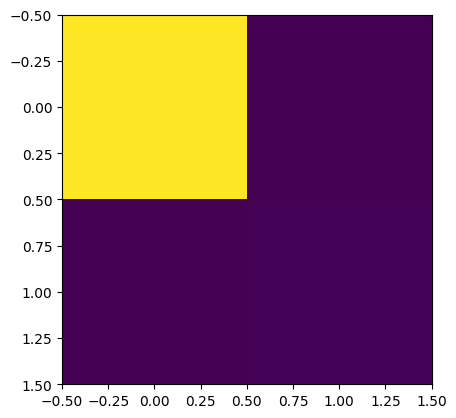

In [199]:
cm_dis_iso = ConfusionMatrixDisplay(confusion_matrix=cm_iso, display_labels = [False, True])
cm_dis_iso.plot()

KeyError: (0, 0)

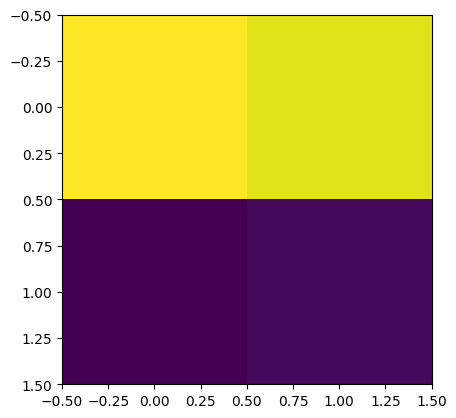

In [126]:
cm_dis_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels = [False, True])
cm_dis_svm.plot()

KeyError: (0, 0)

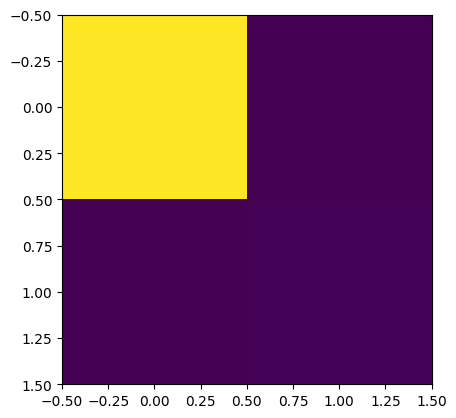

In [200]:
cm_dis_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels = [False, True])
cm_dis_rf.plot()